This notebook shows an example on how to tune the value of a hyperparameter. The example considered is Question [A.2.5](https://nustat.github.io/STAT303-3-class-notes/Assignment%20A.html#tuning-c) of Assignment A, where we need to tune the regularization parameter `C` for a logistic regression model. With this example, you should understand:

1. How to think about the range of values to consider for tuning a hyperparameter.

2. How should the values under consideration be distributed in the range identified in (1).

In [1]:
import time as tm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv('./Datasets/classification_data.csv')

X = data.drop(columns= 'hi_int_prncp_pd')
y = data['hi_int_prncp_pd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45, stratify=y)

In [3]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

## Tuning `C` ([A.2.5](https://nustat.github.io/STAT303-3-class-notes/Assignment%20A.html#tuning-c))
With the optimal degree identified in the previous question, find the optimal regularization parameter `C`. Again use the `cross_val_score` function.

*(4 points)*

We are tuning `C` for the optimal degree of 5 identified in one of the previous questions.

In [4]:
poly = PolynomialFeatures(degree = 5)
X_train_poly = poly.fit_transform(X_train_scaled)

## What should be the minimum value of `C` to consider?

- As `C` is the regularization parameter, it cannot be negative. 
- As `C` = 1/lambda, a value of `C` = 0 will mean infinite regularization, which corresponds to an intercept-only model. Also, as the `LogisticRegression()` function computes the value of lambda as `1/C`, it throws a *division by zero error* if `C = 0`. Thus, we should consider `C>0`.
- Even if `C` is positive, but very small, the value of lambda will be too high, which gives rise to numerical errors. Thus, we need to find the minimum value of `C` that is large enough to avoid numerical errors when fitting the model to the given standardized dataset.

We start with an extremely low value of `C = 1e-10`, and check if the model converges. It doesn't converge! If it had converged, we will consider even lower values of `C`. However, in this case, it fails to converge indicating the possibility that this value of `C` is too small to avoid numerical errors. We keep increasing the order of `C` until we don't see convergence errors. With the code below, we find that for values of `C` starting from `1e-6`, the algorithm successfully converges. Thus, the minimum value of `C` that we consider will be `1e-6`. 

In the plot below, we also see that as we increase `C` starting from `C = 1e-6`, the model coefficients change, which may potentially change model fit and accuracy. Thus, we should consider increasing values of `C` starting from `C = 1e-6`.

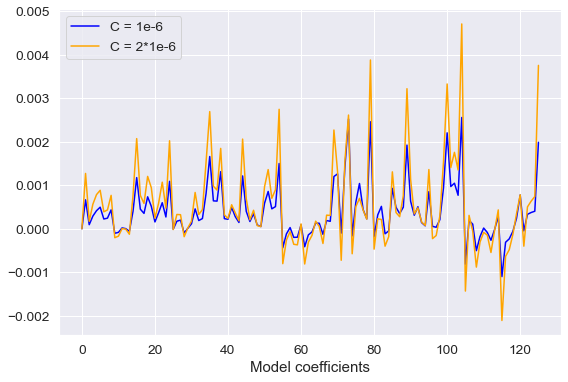

In [5]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e-6, max_iter=100).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 2*1e-6).fit(X_train_poly, y_train)

# Visualizing the model coefficients with changing values of 'C'
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e-6")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 2*1e-6");
plt.xlabel('Model coefficients')
plt.legend();

## What should be the maximum value of `C` to consider?

As `C` tends to infinity, the regularization tends to disappear. Let us consider values of `C` starting from `C = 1e10`. The algorithm converges, and we obtain a plot as shown below. 

However, do we need to start from values as high as `1e10`? 

No, if we check the coefficients for `C = 1e9`, they appear to be the same as the coefficients for `C = 1e10` (see plot below). Thus, we need to identify the maximum value of `C` below which the coefficients tend to change when the value of `C` decreases further.

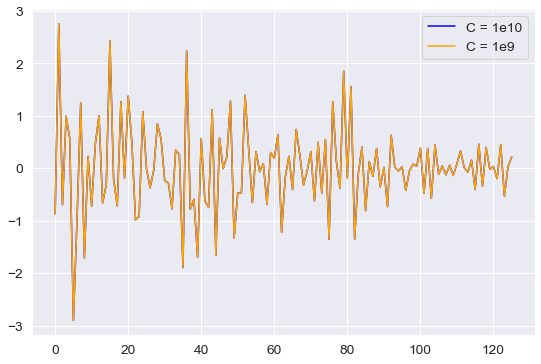

In [6]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e10).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 1e9).fit(X_train_poly, y_train)
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e10")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 1e9")
plt.legend();

There doesn't seem to be a difference even between `C = 1e5` and `C = 1e4` - both the values are still practically infinity. Let us reduce `C` further.

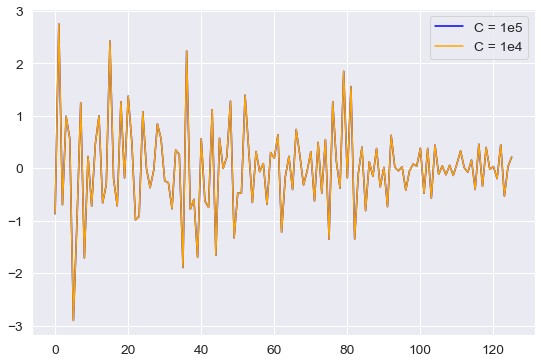

In [7]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e5).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 1e4).fit(X_train_poly, y_train)
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e5")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 1e4")
plt.legend();

Let us consider `C = 1e3`. We get a convergence error. As the solution is found due to algorithms such as gradient descent, the algorithm may just need more steps or more iterations to converge to a solution. Thus, we can try increasing the `max_iter` value to see if it helps the model converge.

C:\Users\akl0407\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


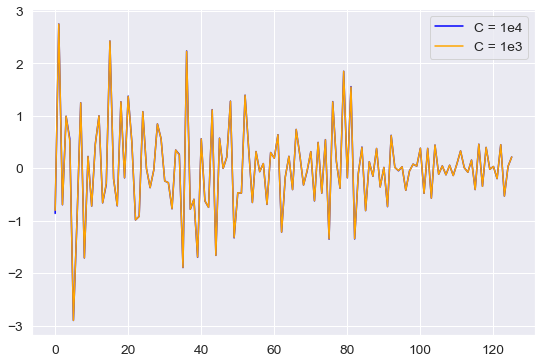

In [8]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e4).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 1e3).fit(X_train_poly, y_train)
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e4")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 1e3")
plt.legend();

Increasing the `max_iter` value does take more time for the code to execute, but it helps the algorithm converge to a solution (see below). However, we see that the coefficients are very similar for the two values of `C`. Thus, we can decrease `C` further.

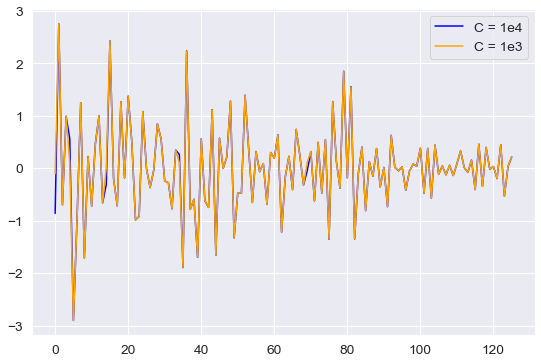

In [9]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e4).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 1e3, max_iter=1000).fit(X_train_poly, y_train)
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e4")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 1e3")
plt.legend();

Even for `C = 1e3` and `C = 1e2`, we have similar coefficients. Let us reduce `C` further.

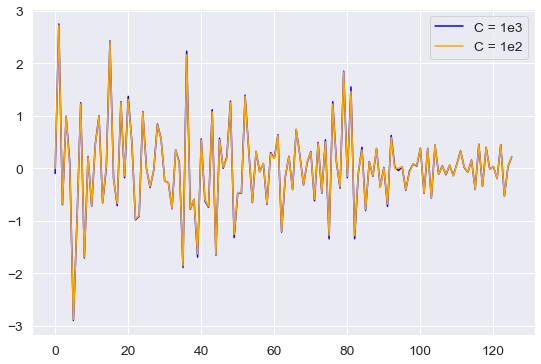

In [10]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e3, max_iter=1000).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 1e2, max_iter=1000).fit(X_train_poly, y_train)
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e3")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 1e2")
plt.legend();

As we decrease `C` from `C = 1e2`, we observe that the coefficients start changing. Thus, the maximum value of `C` that we should consider is `C = 1e2`, as this value is practically infinity, and higher values will not be useful for consideration.

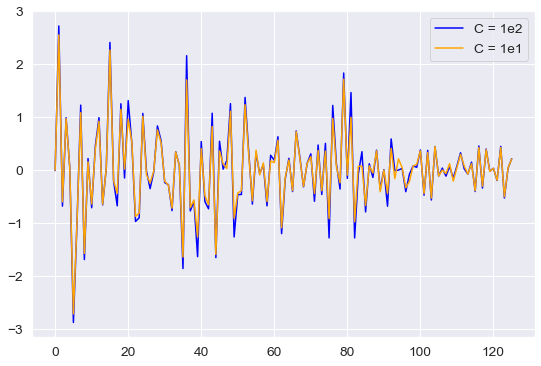

In [11]:
sns.set(font_scale=1.25)
plt.rcParams["figure.figsize"] = (9,6)
model = LogisticRegression(solver = 'newton-cg', C = 1e2, max_iter=1000).fit(X_train_poly, y_train)
model2 = LogisticRegression(solver = 'newton-cg', C = 1e1, max_iter=1000).fit(X_train_poly, y_train)
plt.plot(range(126), model.coef_[0,:], color = 'blue', label = "C = 1e2")
plt.plot(range(126), model2.coef_[0,:], color = 'orange', label = "C = 1e1")
plt.legend();

## Grid search: Coarse grid

Let us consider 50 values of `C` between the minimum and maximum values identified above. We'll consider values of `C` equidistant in the log scale, so that we consider values of all orders (such as `1e-5`, `1e-4`, etc.). Also, we saw earlier that the model coefficients change as the order of values of `C` changes from `1e-6` to `1e-5`. Thus, we should consider values of `C` equidistant in logscale, instead of the linear scale.

In [12]:
start_time = tm.time()
hyperparam_vals = np.logspace(-6,2)
accuracy_iter = []
for c_val in hyperparam_vals:
    poly = PolynomialFeatures(degree = 5)
    X_train_poly = poly.fit_transform(X_train_scaled)
    accuracy_iter.append(cross_val_score(LogisticRegression(solver = 'newton-cg', C = c_val, max_iter=1000),
                                         X_train_poly, 
                                                  y_train, cv = 5, scoring='accuracy'))
print("Time taken = ", (tm.time() - start_time)/60, "minutes")

Time taken =  2.0237973372141522 minutes


Next, we plot the 5-fold accuracy with increasing `C`.

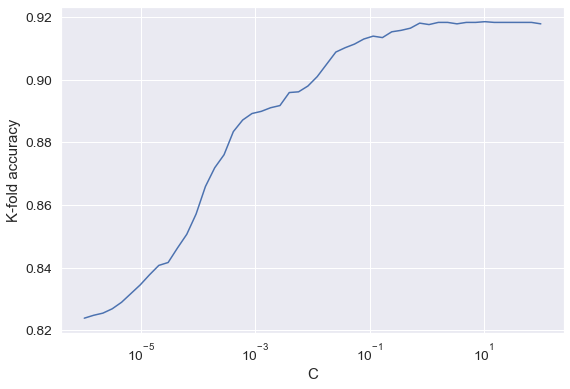

In [13]:
#K-fold accuracy vs C
acc_vector = np.array(accuracy_iter).mean(axis=1)
plt.plot(10**np.linspace(-6, 2), acc_vector)
plt.xscale("log")
plt.xlabel('C')
plt.ylabel('K-fold accuracy');

In [14]:
hyperparam_vals[np.argmax(np.array(accuracy_iter).mean(axis=1))]

10.481131341546853

We observe that the accuracy is the maximum when `C` is more than 0.1. Thus, we'll zoom-in and search for the optimal value in the domain `0.1 < C < 100` to obtain a more precise estimate of optimal `C`.

## Grid search: Finer grid

In [15]:
start_time = tm.time()
hyperparam_vals = np.logspace(-1,2)
accuracy_iter2 = []
for c_val in hyperparam_vals:
    poly = PolynomialFeatures(degree = 5)
    X_train_poly = poly.fit_transform(X_train_scaled)
    accuracy_iter2.append(cross_val_score(LogisticRegression(solver = 'newton-cg', C = c_val, max_iter=1000),
                                         X_train_poly, 
                                                  y_train, cv = 5, scoring='accuracy'))
print("Time taken = ", (tm.time() - start_time)/60, "minutes")

Time taken =  5.047854240735372 minutes


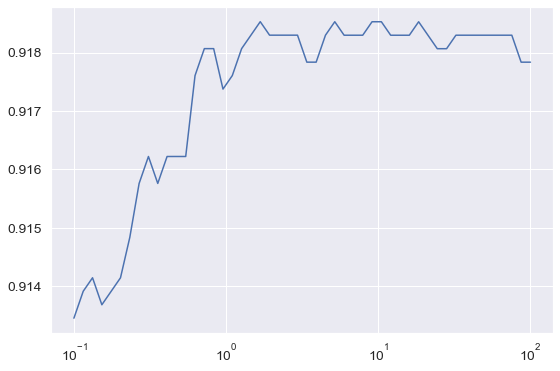

In [16]:
#K-fold accuracy vs C
acc_vector = np.array(accuracy_iter2).mean(axis=1)
plt.plot(10**np.linspace(-1, 2), acc_vector)
plt.xscale("log")

In [17]:
hyperparam_vals[np.argmax(np.array(accuracy_iter2).mean(axis=1))]

1.6768329368110082

From the above plot, all values of `C` in [1, 100] seem to be optimal, and can be chosen as the optimal `C`! 

Indeed, for any value of `C` in [1, 100], we get a similar test accuracy.

In [18]:
logreg = LogisticRegression(solver = 'newton-cg', C =1, max_iter=1000)
logreg.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test_scaled)
y_pred = logreg.predict(X_test_poly)

print(accuracy_score(y_pred, y_test)*100) 

91.6955017301038


In [19]:
logreg = LogisticRegression(solver = 'newton-cg', C =100, max_iter=1000)
logreg.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test_scaled)
y_pred = logreg.predict(X_test_poly)

print(accuracy_score(y_pred, y_test)*100) 

91.62629757785467
